In [57]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('PS') 
import matplotlib.pyplot as plt
import time
import datetime
import filterbyip as fbi
import Cdf
import Pmf

In [58]:
def print_percentiles(c, name):
	print('-----------------------------\n')
	print('percentile values distribution for %s\n' % name)

	print('50th Percentile:%f\n' % c.Percentile(50))
	print('90th Percentile:%f\n' % c.Percentile(90))
	print('99th Percentile:%f\n' % c.Percentile(99))
	print('25th Percentile:%f\n' % c.Percentile(25))
	print('75th Percentile:%f\n' % c.Percentile(75))
	print('20th Percentile:%f\n' % c.Percentile(50))
	print('40th Percentile:%f\n' % c.Percentile(90))
	print('60th Percentile:%f\n' % c.Percentile(99))
	print('80th Percentile:%f\n' % c.Percentile(25))

	print('-----------------------------\n')

In [59]:
def write_percentiles(filename, c):
	with open(filename, 'w') as f:
		f.write('values; percentile\n')
		for x, y in zip(c.xs, c.ps):
			f.write('%.2f, %.2f\n'%(x, y))

In [60]:
%autosave 0

Autosave disabled


In [61]:
import warnings
warnings.filterwarnings('ignore')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [62]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [63]:
tcp_tls_data = "./data/pi-1/tls_perf/output_curl.csv"
quic_data = "./data/pi-1/quic_perf/output_quic.csv"

In [64]:
t = pd.read_csv(quic_data,';')
s = pd.read_csv(tcp_tls_data,';')

In [65]:
t = t.dropna()
s=s.dropna()

In [66]:
s['TTFB']=s['TTFB']-s['DnsLookupTime']
s['TotalDownloadTime']=s['TotalDownloadTime']-s['DnsLookupTime']

In [67]:
s.count()

TimeOfMeasurement              978909
Url                            978909
Ip                             978909
Port                           978909
DnsLookupTime                  978909
TCPHandshakeTime               978909
ConnectionEstablishmentTime    978909
TTFB                           978909
TotalDownloadTime              978909
HttpResponse                   978909
HTTPVersion                    978909
Protocol                       978909
dtype: int64

In [68]:
s.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
0,1546790402,www.google.com,172.217.19.68,443,4.459,20.274,376.742,433.269,467.075,200,HTTP/1.1,TCP/TLS1.2
1,1546790402,www.google.com,172.217.19.68,443,4.398,20.431,335.544,394.947,420.952,200,HTTP2,TCP/TLS1.2
2,1546790404,www.youtube.com,172.217.23.174,443,4.396,10.215,299.194,353.247,1694.650,200,HTTP/1.1,TCP/TLS1.2
3,1546790406,www.youtube.com,172.217.18.110,443,4.369,9.870,296.332,347.673,1544.120,200,HTTP2,TCP/TLS1.2
4,1546790407,www.google.co.in,216.58.207.35,443,4.396,10.024,293.791,371.039,402.559,200,HTTP/1.1,TCP/TLS1.2


In [69]:
t.count()

TimeOfMeasurement              2575527
Url                            2575527
Path                           2575527
Ip                             2575527
Port                           2575527
DNSTime                        2575527
ConnectionEstablishmentTime    2575527
TTFB                           2575527
TotalDownloadTime              2575527
HttpResponse                   2575527
Protocol                       2575527
dtype: int64

In [70]:
t.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
0,1.546790e+09,www.google.com,/,172.217.19.68,443.0,2.815,150.177,205.913,211.239,200.0,Q044
1,1.546790e+09,www.google.com,/,172.217.19.68,443.0,2.912,108.860,163.948,169.084,200.0,Q043
2,1.546790e+09,www.google.com,/,172.217.19.68,443.0,2.867,113.206,168.806,173.932,200.0,Q039
3,1.546790e+09,www.google.com,/,172.217.19.68,443.0,2.883,108.141,164.466,169.579,200.0,Q035
4,1.546790e+09,www.youtube.com,/,216.58.207.46,443.0,3.699,92.614,150.237,338.759,200.0,Q044


In [71]:
def timestamp2human(timestamp):
    return datetime.datetime.fromtimestamp(int(timestamp)).strftime('%c')

In [72]:
s['TimeOfMeasurement'] = s['TimeOfMeasurement'].apply(timestamp2human)

In [73]:
s.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
0,Sun Jan 6 16:00:02 2019,www.google.com,172.217.19.68,443,4.459,20.274,376.742,433.269,467.075,200,HTTP/1.1,TCP/TLS1.2
1,Sun Jan 6 16:00:02 2019,www.google.com,172.217.19.68,443,4.398,20.431,335.544,394.947,420.952,200,HTTP2,TCP/TLS1.2
2,Sun Jan 6 16:00:04 2019,www.youtube.com,172.217.23.174,443,4.396,10.215,299.194,353.247,1694.650,200,HTTP/1.1,TCP/TLS1.2
3,Sun Jan 6 16:00:06 2019,www.youtube.com,172.217.18.110,443,4.369,9.870,296.332,347.673,1544.120,200,HTTP2,TCP/TLS1.2
4,Sun Jan 6 16:00:07 2019,www.google.co.in,216.58.207.35,443,4.396,10.024,293.791,371.039,402.559,200,HTTP/1.1,TCP/TLS1.2


In [74]:
s.tail()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
978904,Sat Jan 26 00:49:30 2019,www.redlink-network.org,35.190.35.16,443,4.433,10.167,241.499,360.644,360.743,302,HTTP2,TCP/TLS1.2
978905,Sat Jan 26 00:49:31 2019,www.reefh2o.com,35.190.16.47,443,124.712,10.257,516.042,841.177,842.292,200,HTTP/1.1,TCP/TLS1.2
978906,Sat Jan 26 00:49:32 2019,www.reefh2o.com,35.190.16.47,443,4.370,10.240,516.546,697.471,803.237,200,HTTP2,TCP/TLS1.2
978907,Sat Jan 26 00:49:34 2019,www.vanbind.com,35.190.71.195,443,509.613,10.470,565.392,742.293,742.380,301,HTTP/1.1,TCP/TLS1.2
978908,Sat Jan 26 00:49:35 2019,www.vanbind.com,35.190.71.195,443,4.392,10.231,516.837,695.768,695.848,301,HTTP2,TCP/TLS1.2


In [75]:
t['TimeOfMeasurement'] = t['TimeOfMeasurement'].apply(timestamp2human)

In [76]:
t.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
0,Sun Jan 6 16:00:01 2019,www.google.com,/,172.217.19.68,443.0,2.815,150.177,205.913,211.239,200.0,Q044
1,Sun Jan 6 16:00:01 2019,www.google.com,/,172.217.19.68,443.0,2.912,108.860,163.948,169.084,200.0,Q043
2,Sun Jan 6 16:00:02 2019,www.google.com,/,172.217.19.68,443.0,2.867,113.206,168.806,173.932,200.0,Q039
3,Sun Jan 6 16:00:02 2019,www.google.com,/,172.217.19.68,443.0,2.883,108.141,164.466,169.579,200.0,Q035
4,Sun Jan 6 16:00:02 2019,www.youtube.com,/,216.58.207.46,443.0,3.699,92.614,150.237,338.759,200.0,Q044


In [77]:
t.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
3576363,Sat Jan 26 00:06:12 2019,www.afronestinvestments.com,/,194.150.248.27,443.0,2.899,46.565,161.769,166.081,301.0,Q039
3576364,Sat Jan 26 00:06:13 2019,www.afronestinvestments.com,/,194.150.248.27,443.0,2.994,40.058,199.154,203.454,301.0,Q035
3576375,Sat Jan 26 00:06:15 2019,www.cavegirlgames.blogspot.com,/,172.217.16.193,443.0,22.375,44.684,202.152,206.801,301.0,Q044
3576376,Sat Jan 26 00:06:16 2019,www.cavegirlgames.blogspot.com,/,172.217.16.193,443.0,3.786,50.489,203.113,207.558,301.0,Q043
3576377,Sat Jan 26 00:06:16 2019,www.cavegirlgames.blogspot.com,/,172.217.16.193,443.0,3.996,45.062,180.995,185.406,301.0,Q039


In [78]:
def filter_by_ip(df, column):
  """reads a DataFrame, calls fbi.filter_v{4,6} to get DataFrames with rows
     containing only v4, v6 endpoints. Returns the two DataFrame as a tuple"""

  dfv6 = fbi.filter_v6(df, column)
  dfv4 = fbi.filter_v4(df, column)
  return dfv4, dfv6

In [79]:
#quic4, quic6 = filter_by_ip(t, column = 'Ip')
quic4 = t[t['Ip'].str.contains("\.")]
quic6 = t[t['Ip'].str.contains("\:")]

In [80]:
quic4.count()

TimeOfMeasurement              2575527
Url                            2575527
Path                           2575527
Ip                             2575527
Port                           2575527
DNSTime                        2575527
ConnectionEstablishmentTime    2575527
TTFB                           2575527
TotalDownloadTime              2575527
HttpResponse                   2575527
Protocol                       2575527
dtype: int64

In [81]:
quic4.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
0,Sun Jan 6 16:00:01 2019,www.google.com,/,172.217.19.68,443.0,2.815,150.177,205.913,211.239,200.0,Q044
1,Sun Jan 6 16:00:01 2019,www.google.com,/,172.217.19.68,443.0,2.912,108.860,163.948,169.084,200.0,Q043
2,Sun Jan 6 16:00:02 2019,www.google.com,/,172.217.19.68,443.0,2.867,113.206,168.806,173.932,200.0,Q039
3,Sun Jan 6 16:00:02 2019,www.google.com,/,172.217.19.68,443.0,2.883,108.141,164.466,169.579,200.0,Q035
4,Sun Jan 6 16:00:02 2019,www.youtube.com,/,216.58.207.46,443.0,3.699,92.614,150.237,338.759,200.0,Q044


In [82]:
#tcp4, tcp6 = filter_by_ip(s, column = 'Ip')
tcp4 = s[s['Ip'].str.contains("\.")]
tcp6 = s[s['Ip'].str.contains("\:")]

In [83]:
tcp4.count()

TimeOfMeasurement              978909
Url                            978909
Ip                             978909
Port                           978909
DnsLookupTime                  978909
TCPHandshakeTime               978909
ConnectionEstablishmentTime    978909
TTFB                           978909
TotalDownloadTime              978909
HttpResponse                   978909
HTTPVersion                    978909
Protocol                       978909
dtype: int64

In [84]:
tcp4.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
0,Sun Jan 6 16:00:02 2019,www.google.com,172.217.19.68,443,4.459,20.274,376.742,433.269,467.075,200,HTTP/1.1,TCP/TLS1.2
1,Sun Jan 6 16:00:02 2019,www.google.com,172.217.19.68,443,4.398,20.431,335.544,394.947,420.952,200,HTTP2,TCP/TLS1.2
2,Sun Jan 6 16:00:04 2019,www.youtube.com,172.217.23.174,443,4.396,10.215,299.194,353.247,1694.650,200,HTTP/1.1,TCP/TLS1.2
3,Sun Jan 6 16:00:06 2019,www.youtube.com,172.217.18.110,443,4.369,9.870,296.332,347.673,1544.120,200,HTTP2,TCP/TLS1.2
4,Sun Jan 6 16:00:07 2019,www.google.co.in,216.58.207.35,443,4.396,10.024,293.791,371.039,402.559,200,HTTP/1.1,TCP/TLS1.2


In [85]:
quic44 = quic4.loc[t['Protocol'] == 'Q044']
quic43 = quic4.loc[t['Protocol'] == 'Q043']
quic39 = quic4.loc[t['Protocol'] == 'Q039']
quic35 = quic4.loc[t['Protocol'] == 'Q035']

In [86]:
quic44.count()

TimeOfMeasurement              620981
Url                            620981
Path                           620981
Ip                             620981
Port                           620981
DNSTime                        620981
ConnectionEstablishmentTime    620981
TTFB                           620981
TotalDownloadTime              620981
HttpResponse                   620981
Protocol                       620981
dtype: int64

In [87]:
quic44.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
0,Sun Jan 6 16:00:01 2019,www.google.com,/,172.217.19.68,443.0,2.815,150.177,205.913,211.239,200.0,Q044
4,Sun Jan 6 16:00:02 2019,www.youtube.com,/,216.58.207.46,443.0,3.699,92.614,150.237,338.759,200.0,Q044
8,Sun Jan 6 16:00:07 2019,www.google.co.in,/,216.58.207.35,443.0,2.872,93.042,167.565,172.798,200.0,Q044
12,Sun Jan 6 16:00:08 2019,www.blogspot.com,/,216.58.207.41,443.0,24.255,93.650,227.656,231.997,302.0,Q044
16,Sun Jan 6 16:00:09 2019,www.google.co.jp,/,216.58.213.227,443.0,2.821,109.900,170.101,175.469,200.0,Q044


In [88]:
quic44.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
3576348,Sat Jan 26 00:06:05 2019,www.sport-mental-coach.ch,/,149.126.4.45,443.0,93.338,74.025,202.611,213.520,200.0,Q044
3576352,Sat Jan 26 00:06:06 2019,www.discografiassalsa.blogspot.com,/,172.217.16.193,443.0,39.361,44.152,796.110,800.498,301.0,Q044
3576357,Sat Jan 26 00:06:08 2019,www.like4like.me,/,103.27.206.12,443.0,2.651,426.255,636.829,641.170,301.0,Q044
3576361,Sat Jan 26 00:06:10 2019,www.afronestinvestments.com,/,194.150.248.27,443.0,2.863,42.846,73.259,77.725,301.0,Q044
3576375,Sat Jan 26 00:06:15 2019,www.cavegirlgames.blogspot.com,/,172.217.16.193,443.0,22.375,44.684,202.152,206.801,301.0,Q044


In [89]:
quic43.count()

TimeOfMeasurement              641174
Url                            641174
Path                           641174
Ip                             641174
Port                           641174
DNSTime                        641174
ConnectionEstablishmentTime    641174
TTFB                           641174
TotalDownloadTime              641174
HttpResponse                   641174
Protocol                       641174
dtype: int64

In [90]:
quic43.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
1,Sun Jan 6 16:00:01 2019,www.google.com,/,172.217.19.68,443.0,2.912,108.860,163.948,169.084,200.0,Q043
5,Sun Jan 6 16:00:03 2019,www.youtube.com,/,172.217.22.110,443.0,3.199,92.530,141.209,248.712,200.0,Q043
9,Sun Jan 6 16:00:07 2019,www.google.co.in,/,216.58.207.35,443.0,2.851,94.519,166.566,171.882,200.0,Q043
13,Sun Jan 6 16:00:08 2019,www.blogspot.com,/,216.58.207.41,443.0,3.106,92.307,222.444,226.965,302.0,Q043
17,Sun Jan 6 16:00:09 2019,www.google.co.jp,/,216.58.213.227,443.0,2.979,109.275,162.568,167.748,200.0,Q043


In [91]:
quic43.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
3576349,Sat Jan 26 00:06:06 2019,www.sport-mental-coach.ch,/,149.126.4.45,443.0,3.456,68.647,165.641,183.223,200.0,Q043
3576353,Sat Jan 26 00:06:07 2019,www.discografiassalsa.blogspot.com,/,172.217.16.193,443.0,3.057,44.240,255.560,260.012,301.0,Q043
3576358,Sat Jan 26 00:06:08 2019,www.like4like.me,/,103.27.206.12,443.0,2.547,451.739,674.960,679.255,301.0,Q043
3576362,Sat Jan 26 00:06:11 2019,www.afronestinvestments.com,/,194.150.248.27,443.0,3.866,51.641,86.791,91.205,301.0,Q043
3576376,Sat Jan 26 00:06:16 2019,www.cavegirlgames.blogspot.com,/,172.217.16.193,443.0,3.786,50.489,203.113,207.558,301.0,Q043


In [92]:
quic39.count()

TimeOfMeasurement              688822
Url                            688822
Path                           688822
Ip                             688822
Port                           688822
DNSTime                        688822
ConnectionEstablishmentTime    688822
TTFB                           688822
TotalDownloadTime              688822
HttpResponse                   688822
Protocol                       688822
dtype: int64

In [93]:
quic39.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
2,Sun Jan 6 16:00:02 2019,www.google.com,/,172.217.19.68,443.0,2.867,113.206,168.806,173.932,200.0,Q039
6,Sun Jan 6 16:00:05 2019,www.youtube.com,/,172.217.18.110,443.0,3.664,94.930,143.193,256.227,200.0,Q039
10,Sun Jan 6 16:00:07 2019,www.google.co.in,/,216.58.207.35,443.0,3.047,92.177,159.597,165.042,200.0,Q039
14,Sun Jan 6 16:00:08 2019,www.blogspot.com,/,216.58.207.41,443.0,3.643,93.251,598.040,602.464,302.0,Q039
18,Sun Jan 6 16:00:09 2019,www.google.co.jp,/,216.58.213.227,443.0,2.910,110.724,175.142,180.572,200.0,Q039


In [94]:
quic39.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
3576350,Sat Jan 26 00:06:06 2019,www.sport-mental-coach.ch,/,149.126.4.45,443.0,3.527,71.673,173.355,183.374,200.0,Q039
3576354,Sat Jan 26 00:06:07 2019,www.discografiassalsa.blogspot.com,/,172.217.16.193,443.0,3.042,44.347,258.067,262.523,301.0,Q039
3576359,Sat Jan 26 00:06:09 2019,www.like4like.me,/,103.27.206.12,443.0,2.734,397.023,592.523,596.937,301.0,Q039
3576363,Sat Jan 26 00:06:12 2019,www.afronestinvestments.com,/,194.150.248.27,443.0,2.899,46.565,161.769,166.081,301.0,Q039
3576377,Sat Jan 26 00:06:16 2019,www.cavegirlgames.blogspot.com,/,172.217.16.193,443.0,3.996,45.062,180.995,185.406,301.0,Q039


In [95]:
quic35.count()

TimeOfMeasurement              624550
Url                            624550
Path                           624550
Ip                             624550
Port                           624550
DNSTime                        624550
ConnectionEstablishmentTime    624550
TTFB                           624550
TotalDownloadTime              624550
HttpResponse                   624550
Protocol                       624550
dtype: int64

In [96]:
quic35.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
3,Sun Jan 6 16:00:02 2019,www.google.com,/,172.217.19.68,443.0,2.883,108.141,164.466,169.579,200.0,Q035
7,Sun Jan 6 16:00:06 2019,www.youtube.com,/,216.58.208.46,443.0,3.782,92.253,140.848,81.691,200.0,Q035
11,Sun Jan 6 16:00:07 2019,www.google.co.in,/,216.58.207.35,443.0,3.166,93.643,162.512,167.785,200.0,Q035
15,Sun Jan 6 16:00:09 2019,www.blogspot.com,/,216.58.207.41,443.0,2.753,95.785,238.174,242.462,302.0,Q035
19,Sun Jan 6 16:00:09 2019,www.google.co.jp,/,216.58.213.227,443.0,2.802,107.819,161.123,166.354,200.0,Q035


In [97]:
quic35.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
3576343,Sat Jan 26 00:06:04 2019,www.frauenverein-wohlen.ch,/,194.150.248.52,443.0,2.908,58.936,471.886,485.757,200.0,Q035
3576347,Sat Jan 26 00:06:05 2019,www.hnopraxisbaden.ch,/,149.126.4.76,443.0,3.440,68.471,134.914,164.809,200.0,Q035
3576351,Sat Jan 26 00:06:06 2019,www.sport-mental-coach.ch,/,149.126.4.45,443.0,3.784,69.677,164.203,174.512,200.0,Q035
3576360,Sat Jan 26 00:06:10 2019,www.like4like.me,/,103.27.206.12,443.0,3.005,396.724,592.954,597.276,301.0,Q035
3576364,Sat Jan 26 00:06:13 2019,www.afronestinvestments.com,/,194.150.248.27,443.0,2.994,40.058,199.154,203.454,301.0,Q035


In [98]:
tcp12 = tcp4.loc[s['Protocol'] == 'TCP/TLS1.2']
tcp13 = tcp4.loc[s['Protocol'] == 'TCP/TLS1.3']

In [99]:
tcp12.count()

TimeOfMeasurement              803209
Url                            803209
Ip                             803209
Port                           803209
DnsLookupTime                  803209
TCPHandshakeTime               803209
ConnectionEstablishmentTime    803209
TTFB                           803209
TotalDownloadTime              803209
HttpResponse                   803209
HTTPVersion                    803209
Protocol                       803209
dtype: int64

In [100]:
tcp12.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
0,Sun Jan 6 16:00:02 2019,www.google.com,172.217.19.68,443,4.459,20.274,376.742,433.269,467.075,200,HTTP/1.1,TCP/TLS1.2
1,Sun Jan 6 16:00:02 2019,www.google.com,172.217.19.68,443,4.398,20.431,335.544,394.947,420.952,200,HTTP2,TCP/TLS1.2
2,Sun Jan 6 16:00:04 2019,www.youtube.com,172.217.23.174,443,4.396,10.215,299.194,353.247,1694.650,200,HTTP/1.1,TCP/TLS1.2
3,Sun Jan 6 16:00:06 2019,www.youtube.com,172.217.18.110,443,4.369,9.870,296.332,347.673,1544.120,200,HTTP2,TCP/TLS1.2
4,Sun Jan 6 16:00:07 2019,www.google.co.in,216.58.207.35,443,4.396,10.024,293.791,371.039,402.559,200,HTTP/1.1,TCP/TLS1.2


In [101]:
tcp12.tail()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
978904,Sat Jan 26 00:49:30 2019,www.redlink-network.org,35.190.35.16,443,4.433,10.167,241.499,360.644,360.743,302,HTTP2,TCP/TLS1.2
978905,Sat Jan 26 00:49:31 2019,www.reefh2o.com,35.190.16.47,443,124.712,10.257,516.042,841.177,842.292,200,HTTP/1.1,TCP/TLS1.2
978906,Sat Jan 26 00:49:32 2019,www.reefh2o.com,35.190.16.47,443,4.370,10.240,516.546,697.471,803.237,200,HTTP2,TCP/TLS1.2
978907,Sat Jan 26 00:49:34 2019,www.vanbind.com,35.190.71.195,443,509.613,10.470,565.392,742.293,742.380,301,HTTP/1.1,TCP/TLS1.2
978908,Sat Jan 26 00:49:35 2019,www.vanbind.com,35.190.71.195,443,4.392,10.231,516.837,695.768,695.848,301,HTTP2,TCP/TLS1.2


In [102]:
tcp13.count()

TimeOfMeasurement              175700
Url                            175700
Ip                             175700
Port                           175700
DnsLookupTime                  175700
TCPHandshakeTime               175700
ConnectionEstablishmentTime    175700
TTFB                           175700
TotalDownloadTime              175700
HttpResponse                   175700
HTTPVersion                    175700
Protocol                       175700
dtype: int64

In [103]:
tcp13.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
183,Sun Jan 6 16:02:07 2019,www.viva.co.id,104.16.59.50,443,28.618,18.939,251.035,280.069,318.531,200,HTTP/1.1,TCP/TLS1.3
185,Sun Jan 6 16:02:07 2019,www.viva.co.id,104.16.59.50,443,28.610,20.001,256.208,299.365,338.911,200,HTTP2,TCP/TLS1.3
291,Sun Jan 6 16:03:36 2019,www.jkforum.net,104.20.193.74,443,12.529,12.271,302.473,450.405,450.513,301,HTTP/1.1,TCP/TLS1.3
293,Sun Jan 6 16:03:37 2019,www.jkforum.net,104.20.193.74,443,12.514,13.721,252.007,384.166,384.285,301,HTTP2,TCP/TLS1.3
323,Sun Jan 6 16:04:03 2019,www.tiki.vn,203.162.81.188,443,28.546,358.197,1001.172,1360.615,1360.695,302,HTTP/1.1,TCP/TLS1.3


In [104]:
tcp13.tail()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
978884,Sat Jan 26 00:49:02 2019,www.hnopraxisbaden.ch,149.126.4.76,443,4.395,29.400,273.910,337.208,366.024,200,HTTP2,TCP/TLS1.3
978886,Sat Jan 26 00:49:03 2019,www.sport-mental-coach.ch,149.126.4.45,443,12.717,31.949,337.540,474.151,506.094,200,HTTP/1.1,TCP/TLS1.3
978888,Sat Jan 26 00:49:04 2019,www.sport-mental-coach.ch,149.126.4.45,443,4.380,28.799,271.165,389.064,399.767,200,HTTP2,TCP/TLS1.3
978890,Sat Jan 26 00:49:07 2019,www.like4like.me,103.27.206.12,443,4.443,208.082,630.773,838.724,838.795,301,HTTP/1.1,TCP/TLS1.3
978892,Sat Jan 26 00:49:09 2019,www.like4like.me,103.27.206.12,443,4.768,194.302,656.115,850.050,850.131,301,HTTP2,TCP/TLS1.3


In [105]:
x = Cdf.MakeCdfFromList(quic43['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic39['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic44['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quic35['ConnectionEstablishmentTime'].values)
x4 = Cdf.MakeCdfFromList(tcp13['ConnectionEstablishmentTime'].values)
x2 =Cdf.MakeCdfFromList(tcp12['ConnectionEstablishmentTime'].values)

In [106]:
write_percentiles('Q039.csv', x1)
write_percentiles('tcp12.csv', x2)
write_percentiles('Q044.csv', x3)
write_percentiles('tcp13.csv', x4)
write_percentiles('Q035.csv', x5)
write_percentiles('Q043.csv', x)

In [107]:
print_percentiles(x1, 'Q039')
print_percentiles(x2, 'tcp12')
print_percentiles(x3, 'Q044')
print_percentiles(x4, 'tcp13')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q039

50th Percentile:46.151000

90th Percentile:220.368000

99th Percentile:653.892000

25th Percentile:44.503000

75th Percentile:61.683000

20th Percentile:46.151000

40th Percentile:220.368000

60th Percentile:653.892000

80th Percentile:44.503000

-----------------------------

-----------------------------

percentile values distribution for tcp12

50th Percentile:314.845000

90th Percentile:788.107000

99th Percentile:1324.140000

25th Percentile:258.199000

75th Percentile:515.331000

20th Percentile:314.845000

40th Percentile:788.107000

60th Percentile:1324.140000

80th Percentile:258.199000

-----------------------------

-----------------------------

percentile values distribution for Q044

50th Percentile:45.642000

90th Percentile:101.417000

99th Percentile:613.834000

25th Percentile:44.398000

75th Percentile:52.664000

20th Percentile:45.642000

40th Percentile:101.417000

60th Percentile:613.834000



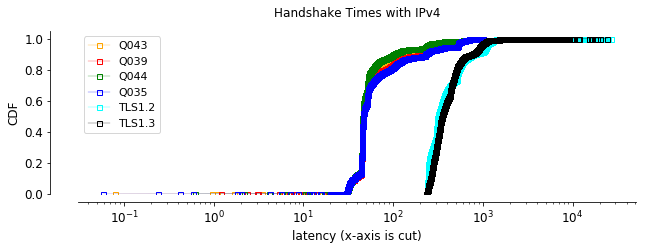

In [108]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([0, 10])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035', 'TLS1.2', 'TLS1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
##ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots/PI/handshake_times_ipv4.png', format='png', bbox_inches='tight')


In [109]:
x = Cdf.MakeCdfFromList(quic43['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic39['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic44['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quic35['TTFB'].values)
x4 = Cdf.MakeCdfFromList(tcp13['TTFB'].values)
x2 =Cdf.MakeCdfFromList(tcp12['TTFB'].values)

In [110]:
write_percentiles('Q039.csv', x1)
write_percentiles('tcp12.csv', x2)
write_percentiles('Q044.csv', x3)
write_percentiles('tcp13.csv', x4)
write_percentiles('Q035.csv', x5)
write_percentiles('Q043.csv', x)

In [111]:
print_percentiles(x1, 'Q039')
print_percentiles(x2, 'tcp12')
print_percentiles(x3, 'Q044')
print_percentiles(x4, 'tcp13')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q039

50th Percentile:229.905000

90th Percentile:700.218000

99th Percentile:936.653000

25th Percentile:194.729000

75th Percentile:294.048000

20th Percentile:229.905000

40th Percentile:700.218000

60th Percentile:936.653000

80th Percentile:194.729000

-----------------------------

-----------------------------

percentile values distribution for tcp12

50th Percentile:544.513000

90th Percentile:1507.063000

99th Percentile:3992.930000

25th Percentile:360.063000

75th Percentile:945.790000

20th Percentile:544.513000

40th Percentile:1507.063000

60th Percentile:3992.930000

80th Percentile:360.063000

-----------------------------

-----------------------------

percentile values distribution for Q044

50th Percentile:229.829000

90th Percentile:596.742000

99th Percentile:912.250000

25th Percentile:197.537000

75th Percentile:275.677000

20th Percentile:229.829000

40th Percentile:596.742000

60th Percentile:9

In [112]:
print_percentiles(x1, 'Q039')
print_percentiles(x2, 'tcp12')
print_percentiles(x3, 'Q044')
print_percentiles(x4, 'tcp13')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q039

50th Percentile:229.905000

90th Percentile:700.218000

99th Percentile:936.653000

25th Percentile:194.729000

75th Percentile:294.048000

20th Percentile:229.905000

40th Percentile:700.218000

60th Percentile:936.653000

80th Percentile:194.729000

-----------------------------

-----------------------------

percentile values distribution for tcp12

50th Percentile:544.513000

90th Percentile:1507.063000

99th Percentile:3992.930000

25th Percentile:360.063000

75th Percentile:945.790000

20th Percentile:544.513000

40th Percentile:1507.063000

60th Percentile:3992.930000

80th Percentile:360.063000

-----------------------------

-----------------------------

percentile values distribution for Q044

50th Percentile:229.829000

90th Percentile:596.742000

99th Percentile:912.250000

25th Percentile:197.537000

75th Percentile:275.677000

20th Percentile:229.829000

40th Percentile:596.742000

60th Percentile:9

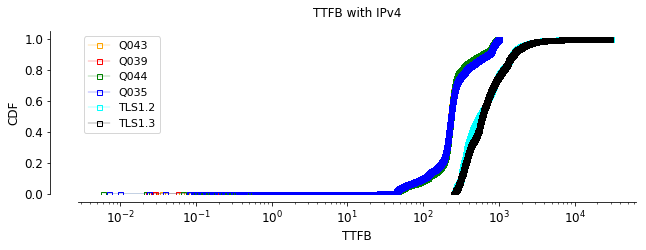

In [113]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035', 'TLS1.2', 'TLS1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
##ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots/PI/TTFB_ipv4.png', format='png', bbox_inches='tight')

In [114]:
x = Cdf.MakeCdfFromList(quic43['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic39['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic44['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quic35['TotalDownloadTime'].values)
x4 = Cdf.MakeCdfFromList(tcp13['TotalDownloadTime'].values)
x2 =Cdf.MakeCdfFromList(tcp12['TotalDownloadTime'].values)

In [115]:
write_percentiles('Q039.csv', x1)
write_percentiles('tcp12.csv', x2)
write_percentiles('Q044.csv', x3)
write_percentiles('tcp13.csv', x4)
write_percentiles('Q035.csv', x5)
write_percentiles('Q043.csv', x)

In [116]:
print_percentiles(x1, 'Q039')
print_percentiles(x2, 'tcp12')
print_percentiles(x3, 'Q044')
print_percentiles(x4, 'tcp13')
print_percentiles(x5, 'Q035')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q039

50th Percentile:236.097000

90th Percentile:732.004000

99th Percentile:942.873000

25th Percentile:201.844000

75th Percentile:320.508000

20th Percentile:236.097000

40th Percentile:732.004000

60th Percentile:942.873000

80th Percentile:201.844000

-----------------------------

-----------------------------

percentile values distribution for tcp12

50th Percentile:613.354000

90th Percentile:1665.791000

99th Percentile:4478.088000

25th Percentile:374.266000

75th Percentile:1114.581000

20th Percentile:613.354000

40th Percentile:1665.791000

60th Percentile:4478.088000

80th Percentile:374.266000

-----------------------------

-----------------------------

percentile values distribution for Q044

50th Percentile:235.932000

90th Percentile:640.359000

99th Percentile:919.669000

25th Percentile:204.549000

75th Percentile:290.906000

20th Percentile:235.932000

40th Percentile:640.359000

60th Percentile:

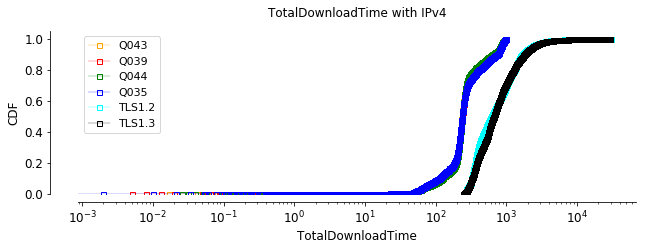

In [117]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q035
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
#ax.set_xlim([0,10])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035', 'TLS1.2', 'TLS1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
##ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots/PI/TotalDownloadTime_ipv4.png', format='png', bbox_inches='tight')